In [ ]:
from google.colab import drive
drive.mount('drive')
%cd /content/drive/MyDrive/ColabNotebooks/archive
!ls

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/archive
normal	potholes


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ColabNotebooks/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ColabNotebooks/archive/potholes/106.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/115.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/107.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/122.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/100.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/108.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/10.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/1.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/120.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/117.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/11.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/113.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/103.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/101.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/118.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/105.

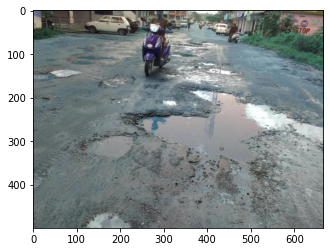

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/ColabNotebooks/archive/potholes/68.jpg"))

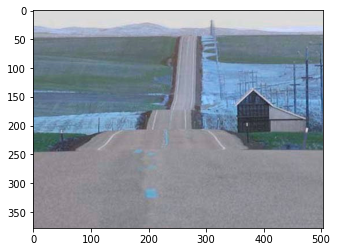

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/ColabNotebooks/archive/normal/171.jpg"))

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/archive',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/archive', 
                                                         target_size=(64, 64),
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         subset='validation')

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(x = training_set, validation_data = validation_generator, epochs = 50)

Epoch 1/5
18/18 [==============================] - 21s 1s/step - loss: 0.1774 - accuracy: 0.9322 - val_loss: 0.4394 - val_accuracy: 0.8444
Epoch 2/5
18/18 [==============================] - 20s 1s/step - loss: 0.1429 - accuracy: 0.9451 - val_loss: 0.4180 - val_accuracy: 0.8593
Epoch 3/5
18/18 [==============================] - 20s 1s/step - loss: 0.1568 - accuracy: 0.9359 - val_loss: 0.4681 - val_accuracy: 0.8370
Epoch 4/5
18/18 [==============================] - 20s 1s/step - loss: 0.1386 - accuracy: 0.9414 - val_loss: 0.3610 - val_accuracy: 0.8741
Epoch 5/5
18/18 [==============================] - 20s 1s/step - loss: 0.1342 - accuracy: 0.9469 - val_loss: 0.5141 - val_accuracy: 0.8370


<Figure size 432x288 with 0 Axes>

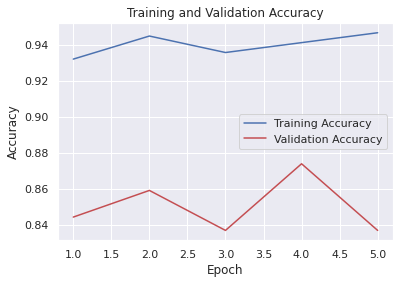

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, accuracy, color='b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

normal


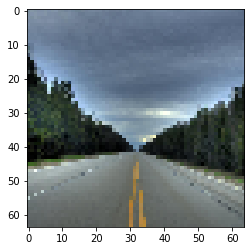

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/ColabNotebooks/archive/normal/306.jpg', target_size = (64, 64))
test_img = image.img_to_array(test_image)
test_img = np.expand_dims(test_img, axis = 0)
result = cnn.predict(test_img)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

print(prediction)
plt.imshow(test_image)

In [ ]:

/content/drive/MyDrive/ColabNotebooks/archive/potholes/102.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/150.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/160.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/175.jpg
/content/drive/MyDrive/ColabNotebooks/archive/potholes/167.jpg